In [3]:
%pylab
import math
import scipy.ndimage as im
import matplotlib.pyplot as plt
import #redacted
import numpy.matlib
import scipy.ndimage

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


ImportError: No module named FMF

In [2]:
V1=#redacted reads files which contains space and image data
total_ims=V1.I.shape[0]
print(total_ims)


NameError: name 'Movies' is not defined

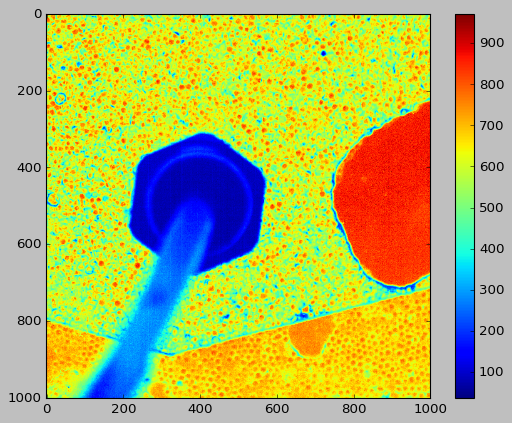

34.5934627171


In [7]:
#Calibrate px to mm ratio
figure
clf()
calib=V1.I[0,1000:2000,1000:2000]
imshow(calib)#750:1500,750:1500]
plt.colorbar()
display(gcf())

#imsave('J:\\Analysis\\20190218-170648_calib.png',calib)
#rotate -6.5o degrees to make the porter parallel
width_port_pix=338.67
width_port_mm=9.79

pxtomm=width_port_pix/width_port_mm
print(pxtomm)



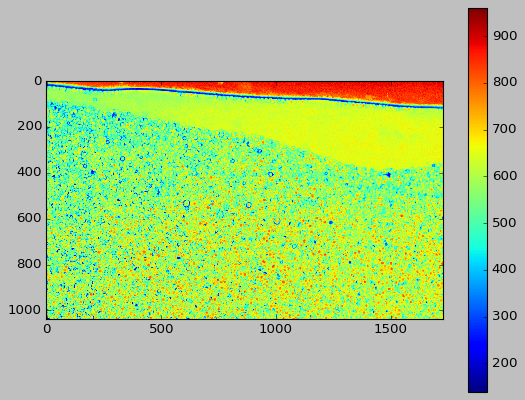

(30.005669235539013, 50.00944872589836)


In [8]:
#Establish Crop 
y_depth1=10
y_depth2=1048
x_left=0
x_right=1730

figure
clf()
imshow(V1.I[0,y_depth1:y_depth2,x_left:x_right])#750:1500,750:1500]
plt.colorbar()
display(gcf())

#Determine true size of image
im_height=(y_depth2-y_depth1)/pxtomm
im_width=(x_right-x_left)/pxtomm

print(im_height,im_width)


In [9]:
#Establish which im numbers and true times

#determine time elapsed given the image number
n=1757;
im_0=76 #when CO2 is started, image after the wave in front of the camera
t_0=V1.T[0] #time camera video is started
t_elapsed=(V1.T[n+im_0]-V1.T[im_0])/60/1000 #in minutes
print(t_elapsed)

#determine the times for the image sequence
truetimes= [5,10,30,60,120,180]
N=[301,601,1726,1757,1818,1879]


#set-up the spacetime split
spacetime_slow=range(im_0,len(V1.T)-1,1)
print(len(spacetime_slow))

60.3884370687
1969


In [10]:
# Optimise images in figure
fig1 = plt.figure(figsize=(10,10))
clf()
Diff=(V1.I[im_0+n,y_depth1:y_depth2,x_left:x_right]).astype(float)-V1.I[im_0,y_depth1:y_depth2,x_left:x_right]
DD=im.gaussian_filter(Diff,3)
DD_opt=DD
imshow(DD,clim=(-510,500), cmap="seismic")
ti=(V1.T[im_0+n]-V1.T[im_0])/60/1000
#ti=(V1.T[im_0+n]-V1.T[0])/60/1000
title('Exp Time {:.2f}min'.format(ti))
colorbar()

In [11]:
#Obtain individual images
IMs= zeros([len(N),y_depth2-y_depth1,x_right-x_left])

for counter1 in range (len(N)):
    IMs[counter1]=V1.I[N[counter1]+im_0,y_depth1:y_depth2,x_left:x_right]



In [12]:
#processimages
PROC=IMs

for counter2 in range (len(N)):  
    Diff=(IMs[counter2].astype(float)-V1.I[im_0,y_depth1:y_depth2,x_left:x_right])
    DD=im.gaussian_filter(Diff,3)
    PROC[counter2]=DD


In [14]:
python_course_green = "#476042"
fig = plt.figure(figsize=(10,10))

counter3=0
sub1 = plt.subplot(3,2, 1)
imshow(PROC[counter3],clim=(-510,500), cmap="seismic")
sub1.set_xticks(())
sub1.set_yticks(())
sub1.set_title('{} min'.format(truetimes[counter3]))

counter3=3
sub2 = plt.subplot(3,2, 2)               
imshow(PROC[counter3],clim=(-510,500), cmap="seismic")
sub2.set_xticks(())
sub2.set_yticks(())
sub2.set_title('{} min'.format(truetimes[counter3]))

counter3=1
sub3 = plt.subplot(3,2, 3)
imshow(PROC[counter3],clim=(-510,500), cmap="seismic")
sub3.set_xticks(())
sub3.set_yticks(())
sub3.set_title('{} min'.format(truetimes[counter3]))

counter3=4
sub4 = plt.subplot(3,2, 4, axisbg=python_course_green)
imshow(PROC[counter3],clim=(-510,500), cmap="seismic")
sub4.set_xticks(())
sub4.set_yticks(())
sub4.set_title('{} min'.format(truetimes[counter3]))

counter3=2
sub5 = plt.subplot(3,2, 5, axisbg=python_course_green)
imshow(PROC[counter3],clim=(-510,500), cmap="seismic")
sub5.set_xticks(())
sub5.set_yticks(())
sub5.set_title('{} min'.format(truetimes[counter3]))

counter3=5
sub6 = plt.subplot(3,2, 6, axisbg=python_course_green)
imshow(PROC[counter3],clim=(-510,500), cmap="seismic")
sub6.set_xticks(())
sub6.set_yticks(())
sub6.set_title('{} min'.format(truetimes[counter3]))


fig.tight_layout()
plt.show()


In [15]:
# Calculate spacetime figure
#Select Horizontal and vertical lines to follow
Ver=[100,1450]
Horz=[180,500]

lines=DD_opt
#lines[Horz,:]=-510
#lines[:,Ver]=-510
#figure
#clf()
#imshow(lines,clim=(-510,500), cmap="seismic")
#plt.colorbar()
#display(gcf())


###################################
STPROC_V1=zeros([len(spacetime_slow),y_depth2-y_depth1])
STPROC_V2=zeros([len(spacetime_slow),y_depth2-y_depth1])
STPROC_H1=zeros([len(spacetime_slow),x_right-x_left])
STPROC_H2=zeros([len(spacetime_slow),x_right-x_left])
print(STPROC_V1.shape)

#slow images
loopcounter=-1
for counter4 in spacetime_slow:
    loopcounter=loopcounter+1
    #print(loopcounter)
    Diff=(V1.I[counter4,y_depth1:y_depth2,x_left:x_right]).astype(float)-V1.I[im_0,y_depth1:y_depth2,x_left:x_right]
    DD=im.gaussian_filter(Diff,3)
    #print(DD.shape)
    STPROC_V1[loopcounter,:]=DD[:,Ver[0]]
    STPROC_V2[loopcounter,:]=DD[:,Ver[1]]
    STPROC_H1[loopcounter,:]=DD[Horz[0],:]
    STPROC_H2[loopcounter,:]=DD[Horz[1],:]




#side=concatenate((V1.I[im_0,y_depth1:y_depth2,x_left:x_right],V1.I[im_0,y_depth1:y_depth2,x_left:x_right]),axis=-1)
#print(side.shape)
#print(V1.I[im_0,y_depth1:y_depth2,x_left:x_right].shape)

#fast images

    
######APPROACH 1 work with 3D arrays
#fullPROC= zeros([V1.I.shape[0],y_depth2-y_depth1,x_right-x_left])
#unprocessed=V1.I[0:V1.I.shape[0]-1,y_depth1:y_depth2, x_left:x_right]
#im_0_mat= numpy.tile(V1.I[im_0,y_depth1:y_depth2, x_left:x_right],(V1.I.shape[0]-1,1,1))
#print(unprocessed.shape)                       
#print(im_0_mat.shape)      
#Diff_mat=(unprocessed.astype(float)-im_0_mat)
#imshow(im_0_mat)    

#imshow(im_0_mat)

#Diff2=(unprocessed.astype(float)-V1.I[im_0,y_depth1:y_depth2,x_left:x_right])


#print(Diff2[im_0])

#figure 
#imshow(Diff2[0])

#for counter4 in range (V1.I.shape[0]):  
 #   Diff=(IMs[counter2].astype(float)-V1.I[im_0,y_depth1:y_depth2,x_left:x_right])
  #  DD=im.gaussian_filter(Diff,3)
  #  PROC[counter2]=DD





(1969L, 1038L)


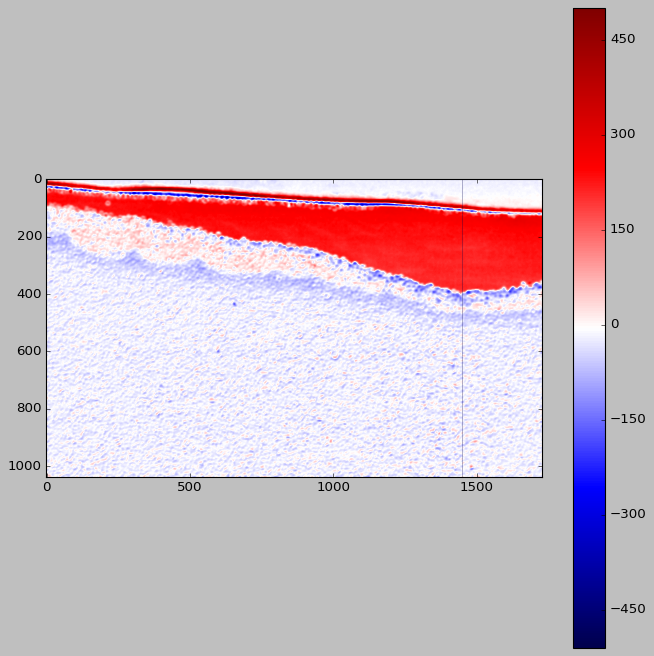

In [16]:
fig5 = plt.figure(figsize=(10,10))
clf()
lines[Horz,:]=-510
lines[:,Ver]=-510
imshow(lines,clim=(-510,500), cmap="seismic")
plt.colorbar()
display(gcf())


In [17]:
#display fig

fig3 = plt.figure(figsize=(10,10))
sub1 = plt.subplot(1,2, 1)
imshow(fliplr(scipy.ndimage.rotate(STPROC_V1,-90)),clim=(-510,500), cmap="seismic")
sub2 = plt.subplot(1,2, 2)
imshow(fliplr(scipy.ndimage.rotate(STPROC_V2,-90)),clim=(-510,500), cmap="seismic")

In [18]:
#display fig

fig4 = plt.figure(figsize=(10,10))
clf()
sub1 = plt.subplot(1,2, 1)
imshow(STPROC_H1,clim=(-510,500), cmap="seismic")
sub2 = plt.subplot(1,2, 2)
imshow(STPROC_H2,clim=(-510,500), cmap="seismic")

In [26]:
tstart=1730-5-3
fig5 = plt.figure(figsize=(10,10))
imshow(fliplr(scipy.ndimage.rotate(STPROC_V2[tstart:-1,:],-90)),clim=(-510,500), cmap="seismic")
matplotlib.pyplot.xlabel('time')
matplotlib.pyplot.ylabel('pixel')
t_start_true=(V1.T[tstart+im_0]-V1.T[im_0])/60/1000 #in minutes
print(t_start_true)

28.7000000041
